In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


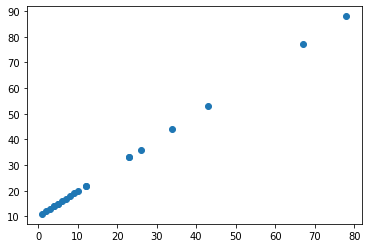

In [3]:

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,12,34,23,23,12,4,5,67,43,26,78], dtype=np.float32)
y = x+10

plt.scatter(x,y)

In [4]:
tf.random.set_seed(22)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
    ])
model.compile(loss=tf.keras.losses.mae, 
optimizer= tf.keras.optimizers.SGD(),
metrics=['mae'])

model.fit(x, y, epochs=100)

Epoch 1/100


2022-05-29 19:18:30.333053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 276ms/step - loss: 30.6910 - mae: 30.6910
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 27.3721 - mae: 27.3721
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 24.0532 - mae: 24.0532
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 20.7342 - mae: 20.7342
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 17.4153 - mae: 17.4153
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 14.0964 - mae: 14.0964
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7774 - mae: 10.7774
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5221 - mae: 7.5221
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0168 - mae: 7.0168
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0109 - mae: 7.0109
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0

In [5]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(100, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(100, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(1)
    ])
    
model2.compile(
    loss=tf.keras.losses.mae, 
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.0045),
    metrics=['mae'])

model2.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 375ms/step - loss: 27.5827 - mae: 27.5827
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 22.8404 - mae: 22.8404
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 18.0067 - mae: 18.0067
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4037 - mae: 12.4037
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8910 - mae: 6.8910
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.2345 - mae: 9.2345
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2835 - mae: 11.2835
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 11.4031 - mae: 11.4031
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2042 - mae: 10.2042
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.5871 - mae: 8.5871
Epoch 11/100
1/1 [==============================] - 0s 3ms/step

In [6]:
model.predict([20,24]), model2.predict([20,24])

1/1 [==============================] - 0s 65ms/step


(array([[25.674433],
        [30.663607]], dtype=float32),
 array([[28.356266],
        [32.04074 ]], dtype=float32))

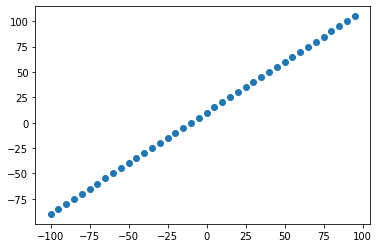

In [7]:
datax = tf.range(-100,100,5)
datay = datax + 10

plt.scatter(datax,datay)

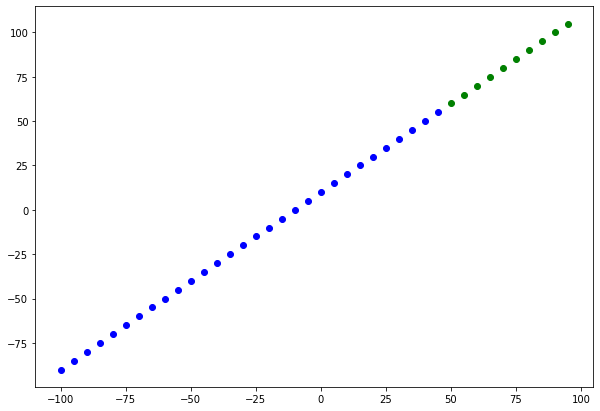

In [8]:
train_x = datax[:30]
train_y = datay[:30]

test_x = datax[30:]
test_y = datay[30:]

plt.figure(figsize=(10,7))
plt.scatter(train_x,train_y, c='blue', label='train data')
plt.scatter(test_x,test_y, c='green', label='test data')

In [9]:
model.summary(), model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)  

(None, None)

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png',show_shapes=True, show_layer_names=True), plot_model(model2,  to_file='model2_plot.png',)


(<IPython.core.display.Image object>, <IPython.core.display.Image object>)

In [17]:
def predict_evaluation_vis(train_x=train_x, train_y=train_y, test_x=test_x, test_y=test_y, pred_x=[], pred_y=[]):
    plt.figure(figsize=(10,7))
    plt.scatter(train_x,train_y, c='blue', label='train data')
    plt.scatter(test_x,test_y, c='green', label='test data')
    plt.scatter(pred_x, pred_y, c='red', label='prediction')
    plt.legend()
    plt.show()

1/1 [==============================] - 0s 23ms/step


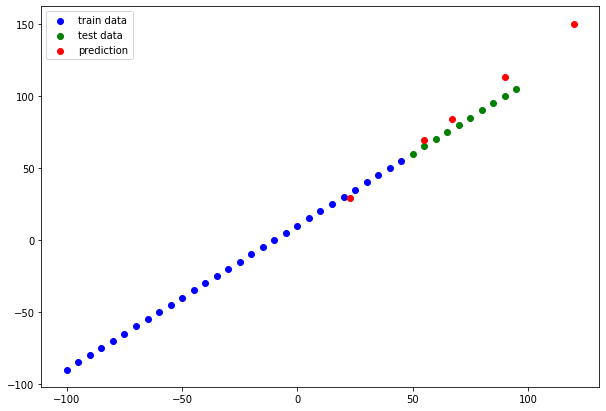

In [18]:
pre_x = np.array([23,55,67,90,120])
pre_y = model.predict(pre_x)

predict_evaluation_vis(pred_x=pre_x, pred_y=pre_y)